<a href="https://colab.research.google.com/github/SadnaPutriYuliarti/SadnaPutriYuliarti/blob/main/MiniProject_G231220090.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x:datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
print(dataset.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  


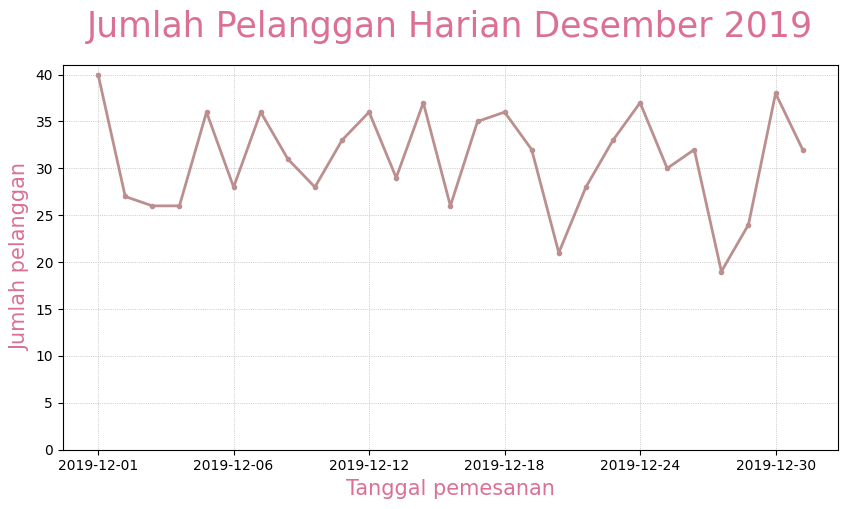

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Jumlah Pelanggan Harian Desember 2019', loc='center', pad=20, fontsize=25, color='#DB7093')
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='#BC8F8F', marker='.', linewidth=2)
plt.xlabel('Tanggal pemesanan', fontsize=15, color='#DB7093')
plt.ylabel('Jumlah pelanggan', fontsize=15, color='#DB7093')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()


**CASE 1 & 2**

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


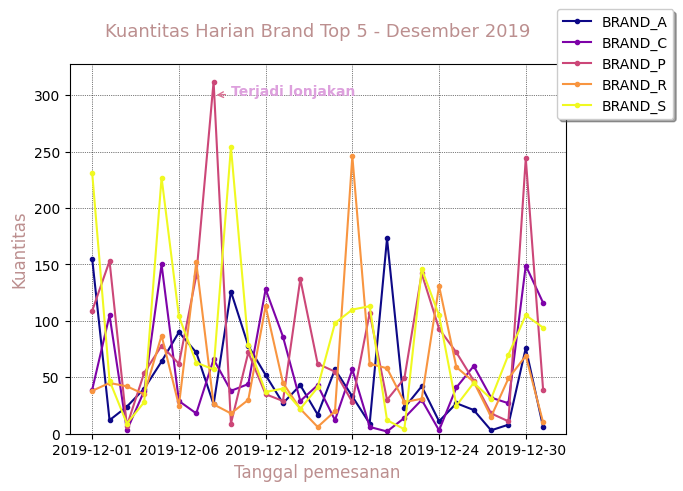

In [ ]:
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')

plt.title('Kuantitas Harian Brand Top 5 - Desember 2019',loc='center',pad=20, fontsize=13, color='#BC8F8F')
plt.xlabel('Tanggal pemesanan', fontsize = 12, color='#BC8F8F')
plt.ylabel('Kuantitas',fontsize = 12, color='#BC8F8F')
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 300), xytext=(8, 300), weight='bold', color='#DDA0DD', arrowprops=dict(arrowstyle='->', connectionstyle="arc3", color='#DB7093'))

print(top_brands)
plt.show()

**CASE 3**

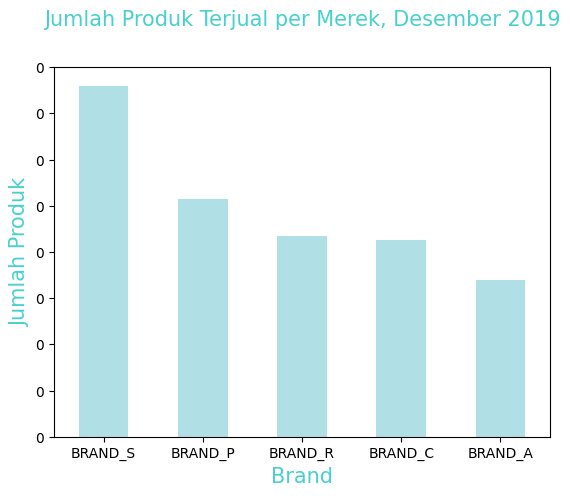

In [ ]:
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='#B0E0E6')
plt.title('Jumlah Produk Terjual per Merek, Desember 2019', loc='center', pad=30, fontsize=15, color='#48D1CC')
plt.xlabel('Brand', fontsize=15, color='#48D1CC')
plt.ylabel('Jumlah Produk', fontsize=15, color='#48D1CC')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

**CASE 4**

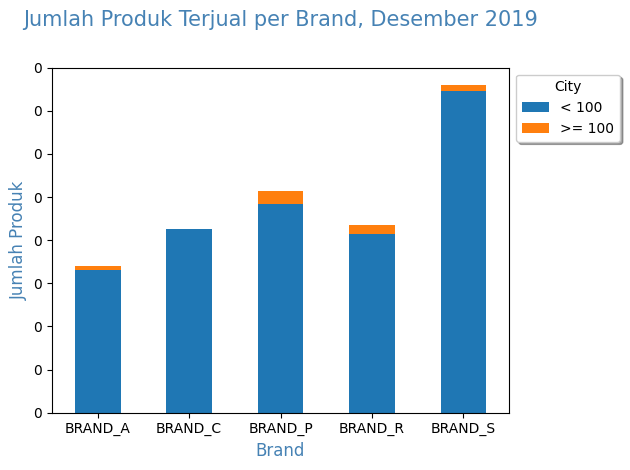

In [ ]:
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)

plt.title('Jumlah Produk Terjual per Brand, Desember 2019', loc='center', pad=30, fontsize=15, color='#4682B4')
plt.xlabel('Brand', fontsize=12,  color='#4682B4')
plt.ylabel('Jumlah Produk', fontsize=12,  color='#4682B4')
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1, title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**CASE 5**

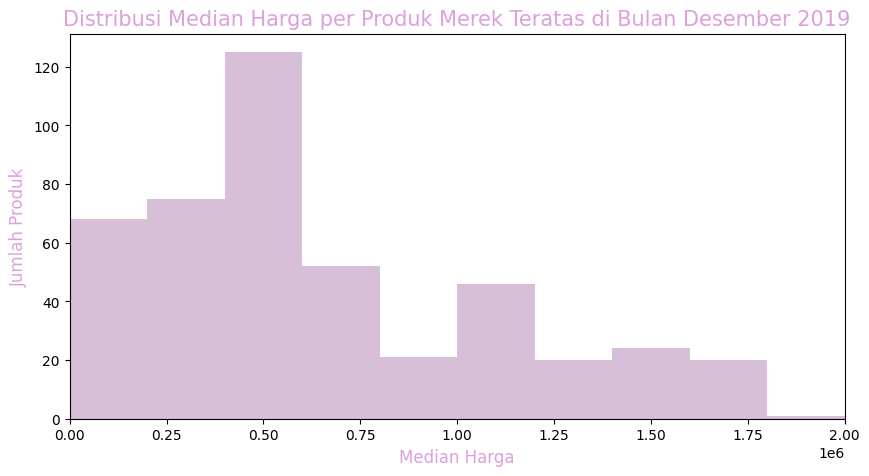

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='#D8BFD8')
plt.title('Distribusi Median Harga per Produk Merek Teratas di Bulan Desember 2019',fontsize=15, color='#DDA0DD')
plt.xlabel('Median Harga', fontsize = 12, color='#DDA0DD')
plt.ylabel('Jumlah Produk',fontsize = 12, color='#DDA0DD')
plt.xlim(xmin=0,xmax=2000000)
plt.show()

**CASE 6 A**



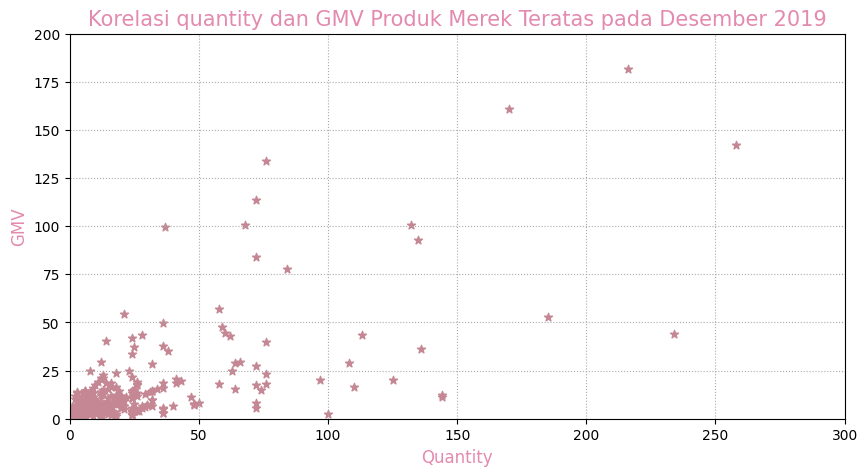

In [ ]:
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
plt.figure(figsize=(10, 5))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='*', color='#C48793')
plt.title('Korelasi quantity dan GMV Produk Merek Teratas pada Desember 2019',fontsize=15, color='#E38AAE')
plt.xlabel('Quantity', fontsize = 12, color='#E38AAE')
plt.ylabel('GMV',fontsize = 12, color='#E38AAE')
plt.grid(color='darkgray', linestyle=':')
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

**CASE 6 B**

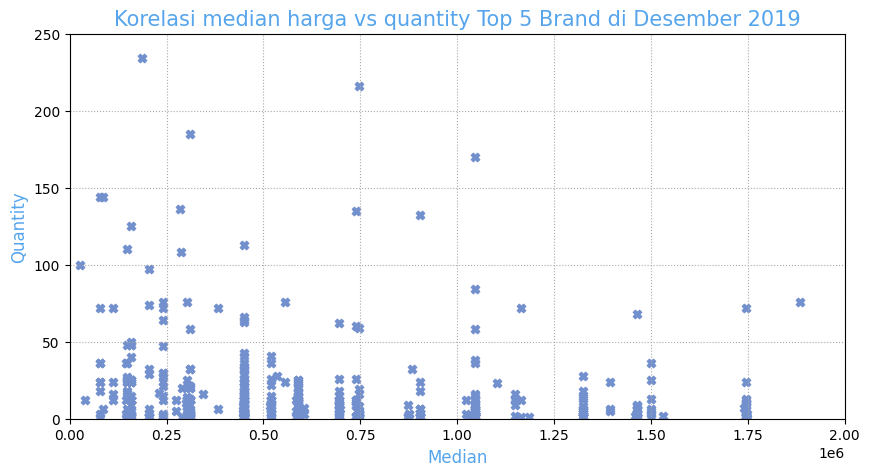

In [ ]:
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
plt.figure(figsize=(10, 5))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='X', color='#728FCE')
plt.title('Korelasi median harga vs quantity Top 5 Brand di Desember 2019',fontsize=15, color='#56A5EC')
plt.xlabel('Median', fontsize = 12, color='#56A5EC')
plt.ylabel('Quantity',fontsize = 12, color='#56A5EC')
plt.grid(color='darkgray', linestyle=':')
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()